In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Iowa Housing Dataset:
### - Domain: Housing dataset with over 80 features. Each feature can lower or increase the value of the house. 
### - Given : Train dataset for training the model. Test dataset to predict using the model.
### - Goal: Predict the Sale Price on the test dataset based off the train dataset
### - Problem Statement: Classification and Regression models. In this case, we are doing regression.
### - Data Summary: 1460 data points and 80 features. 
### - This dataset is similar for sales forecasting for a company. Taking features and fitting and predicting.

# Load in the data for both train and test:
### - Confirm the data points and features of the data.
### - Observe the data.

In [2]:
train_df = pd.read_csv("data/train.csv")

### test and train dataset difference - datapoints and SalePrice column

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df = pd.read_csv("data/test.csv")

In [5]:
train_df.set_index("Id", inplace=True)
test_df.set_index("Id", inplace=True)

In [6]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
#Sales Price is the dependent variable (outcome) while the features are the independent variable (predictor). 
#sns.pairplot(train_df)

In [8]:
train_df.shape, test_df.shape

((1460, 80), (1459, 79))

In [9]:
set(train_df) - set(test_df)

{'SalePrice'}

In [10]:
set(test_df) - set(train_df)

set()

In [11]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

(None, None)

# Observe the Data: 
### - We want to change the "object" to "category". Category is another name for factor.
### - We think of category/factor as finite numbers such as class and grades, while integers are infinite numbers such as price and years.
### - End goal is to separate the features of these datasets to a numeric and categorical. 

In [12]:
for column in train_df.select_dtypes(["object"]):
    train_df[column] = train_df[column].astype("category")

In [13]:
for column in test_df.select_dtypes(["object"]):
    test_df[column] = test_df[column].astype("category")

In [14]:
train_df.MSSubClass =   train_df.MSSubClass.astype('category')
train_df.OverallQual =  train_df.OverallQual.astype('category')
train_df.OverallCond =  train_df.OverallCond.astype('category')
train_df.BsmtFullBath = train_df.BsmtFullBath.astype('category')
train_df.BsmtHalfBath = train_df.BsmtHalfBath.astype('category')
train_df.FullBath =     train_df.FullBath.astype('category')
train_df.HalfBath =     train_df.HalfBath.astype('category')
train_df.BedroomAbvGr = train_df.BedroomAbvGr.astype('category')
train_df.KitchenAbvGr = train_df.KitchenAbvGr.astype('category')
train_df.TotRmsAbvGrd = train_df.TotRmsAbvGrd.astype('category')
train_df.Fireplaces =   train_df.Fireplaces.astype('category')
train_df.GarageCars =   train_df.GarageCars.astype('category')
train_df.MoSold =       train_df.MoSold.astype('category')

In [15]:
test_df.MSSubClass =   test_df.MSSubClass.astype('category')
test_df.OverallQual =  test_df.OverallQual.astype('category')
test_df.OverallCond =  test_df.OverallCond.astype('category')
test_df.BsmtFullBath = test_df.BsmtFullBath.astype('category')
test_df.BsmtHalfBath = test_df.BsmtHalfBath.astype('category')
test_df.FullBath =     test_df.FullBath.astype('category')
test_df.HalfBath =     test_df.HalfBath.astype('category')
test_df.BedroomAbvGr = test_df.BedroomAbvGr.astype('category')
test_df.KitchenAbvGr = test_df.KitchenAbvGr.astype('category')
test_df.TotRmsAbvGrd = test_df.TotRmsAbvGrd.astype('category')
test_df.Fireplaces =   test_df.Fireplaces.astype('category')
test_df.GarageCars =   test_df.GarageCars.astype('category')
test_df.MoSold =       test_df.MoSold.astype('category')

# Find empty cells for numeric and categorical features:
### Note that these datasets have missing values. Nan

In [16]:
def empty_count(data, feature):
    empty_mask = data[feature].isnull()
    empty_count = len(data[feature][empty_mask])
    return empty_count

def empty_count_total(data):
    for feature in data.columns:
        empty_count1 = empty_count(data,feature)
        if empty_count1 > 0:
            print(feature, empty_count1)
            
def empty_feature(data):
    list_feature=[]
    for feature in data.columns:
        empty_count1 = empty_count(data,feature)
        if empty_count1 > 0:
            list_feature.append(feature)
    return list_feature

### Fill numeric features with its mean. 
### Note that we cannot proceed data with empty cells.

In [17]:
empty_count_total(train_df.select_dtypes(exclude = "category"))

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [18]:
train_df["LotFrontage"] = train_df["LotFrontage"].fillna(train_df["LotFrontage"].mean())
train_df["MasVnrArea"] = train_df["MasVnrArea"].fillna(train_df["MasVnrArea"].mean())
train_df["GarageYrBlt"] = train_df["GarageYrBlt"].fillna(train_df["GarageYrBlt"].mean())

In [19]:
empty_count_total(train_df.select_dtypes(exclude = "category"))

In [20]:
empty_count_total(test_df.select_dtypes(exclude = "category"))

LotFrontage 227
MasVnrArea 15
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
GarageYrBlt 78
GarageArea 1


In [21]:
# use the mean from the train dataset because we do not want to expose the answers from the test dataset.
test_df.LotFrontage.fillna(train_df.LotFrontage.mean(), inplace=True)
test_df.MasVnrArea.fillna(train_df.MasVnrArea.mean(), inplace=True)
test_df.BsmtFinSF1.fillna(train_df.BsmtFinSF1.mean(), inplace=True)
test_df.BsmtFinSF2.fillna(train_df.BsmtFinSF2.mean(), inplace=True)
test_df.BsmtUnfSF.fillna(train_df.BsmtUnfSF.mean(), inplace=True)
test_df.TotalBsmtSF.fillna(train_df.TotalBsmtSF.mean(), inplace=True)
test_df.GarageYrBlt.fillna(train_df.GarageYrBlt.mean(), inplace=True)
test_df.GarageArea.fillna(train_df.GarageArea.mean(), inplace=True)

In [161]:
#test it again, and no missing values shows
empty_count_total(test_df.select_dtypes(exclude = "category"))

### The rest will be category data. We cannot replace with mean here because they are factors and not integers.
### Average mean has no meaning here for category. Months for example.

In [162]:
train_df["Alley"].unique()

[without, Grvl, Pave]
Categories (3, object): [without, Grvl, Pave]

In [23]:
empty_count_total(train_df)

Alley 1369
MasVnrType 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [24]:
train_category_empty = empty_feature(train_df)
train_category_empty

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [25]:
empty_count_total(test_df)

MSZoning 4
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinType2 42
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageFinish 78
GarageCars 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


### Added all the features with missing values into a list which I can grab later.

In [26]:
test_category_empty = empty_feature(test_df)
test_category_empty 

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

### We will replace it with "without" Usually would use None, but None is an actual factor in the dataset

In [27]:
def replace_empty_train(feature, value):
    train_df[feature].cat.add_categories([value], inplace=True)
    train_df[feature].fillna(value, inplace=True)

In [28]:
def replace_empty_test(feature, value):
    test_df[feature].cat.add_categories([value], inplace=True)
    test_df[feature].fillna(value, inplace=True)

In [29]:
for feature in train_category_empty:
    replace_empty_train(feature, "without")

In [30]:
empty_count_total(train_df)

In [31]:
for feature in test_category_empty:
    replace_empty_test(feature, "without")

In [32]:
empty_count_total(test_df)

# Basic EDA - SalePrice on categorical features

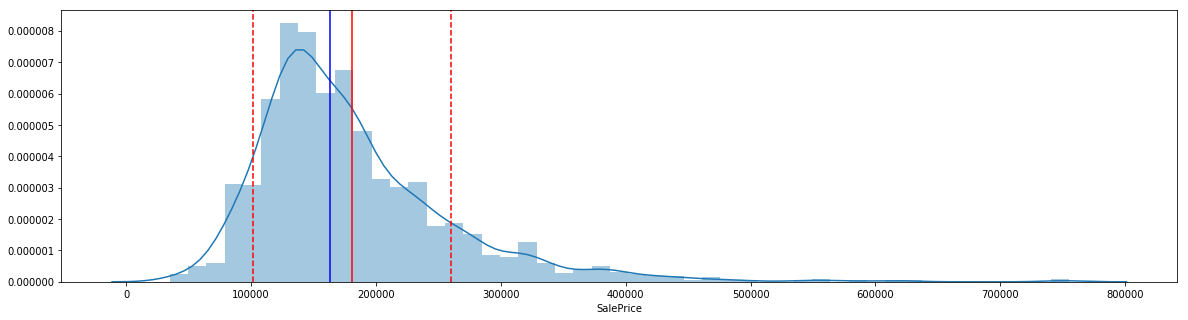

In [33]:
plt.figure(figsize=(20,5))

sns.distplot(train_df["SalePrice"])
plt.axvline(train_df["SalePrice"].mean(), color = "red")
plt.axvline(train_df["SalePrice"].median(), color = "blue")
plt.axvline(train_df["SalePrice"].mean() + train_df["SalePrice"].std(), color = "red", ls="dashed")
plt.axvline(train_df["SalePrice"].mean() - train_df["SalePrice"].std(), color = "red", ls="dashed")

In [34]:
def distplot_numeric_category(data, numeric_feature_name, categorical_feature_name):
    for unique in data[numeric_feature_name].unique():
        group_mask = (unique == data[numeric_feature_name])
        group_1 = train_df[group_mask]
        sns.distplot(group_1[categorical_feature_name], label=unique)
        plt.legend()

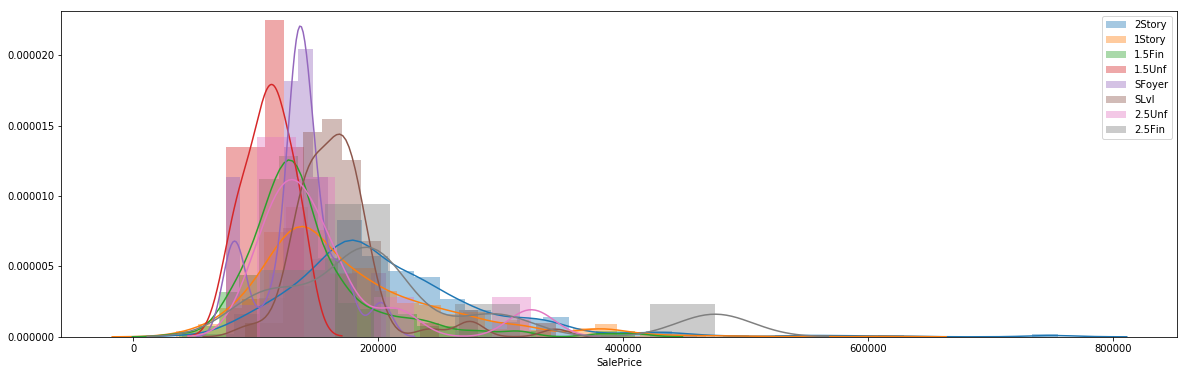

In [35]:
plt.figure(figsize=(20,6))
distplot_numeric_category(train_df, "HouseStyle", "SalePrice")

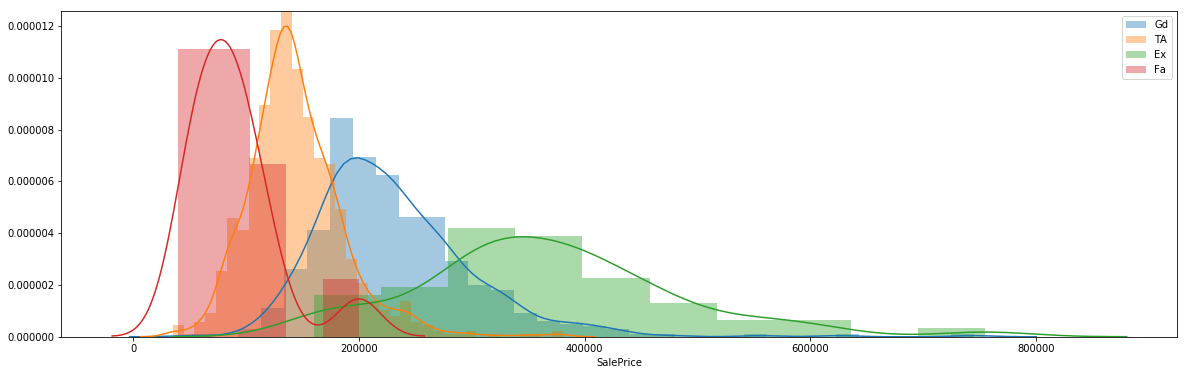

In [36]:
plt.figure(figsize=(20,6))
distplot_numeric_category(train_df, "ExterQual", "SalePrice")

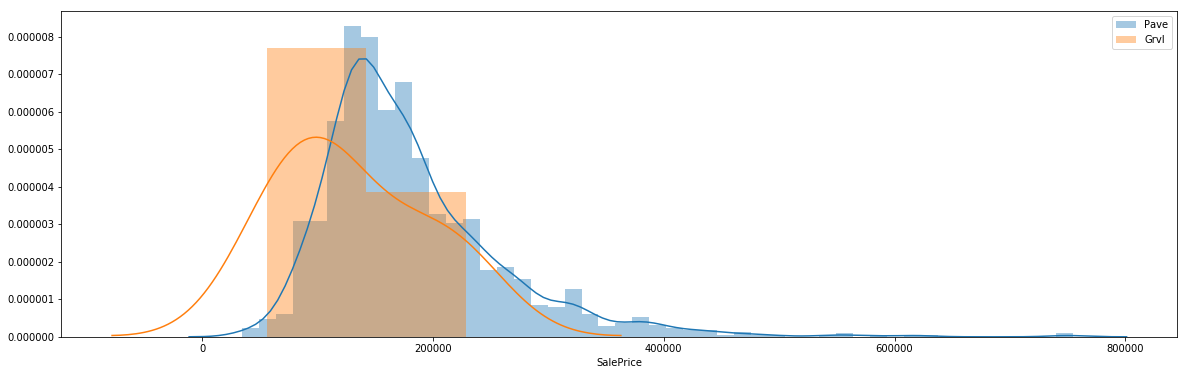

In [37]:
plt.figure(figsize=(20,6))
distplot_numeric_category(train_df, "Street", "SalePrice")

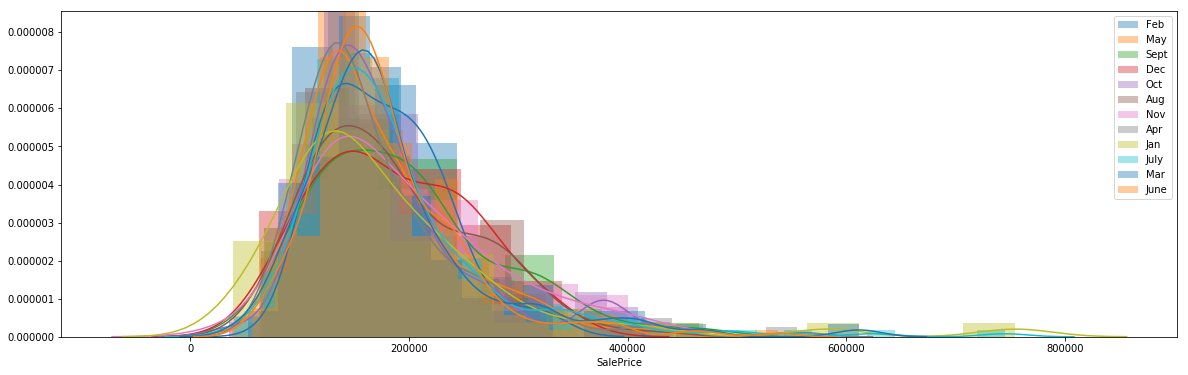

In [155]:
months_list = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
train_df2 = train_df.copy(deep=True)
train_df2["MoSold"] = train_df2["MoSold"].astype(int)
train_df2["MoSold"] = train_df2["MoSold"] - 1
train_df2["MoSold"] = [months_list[i] for i in train_df2["MoSold"]]
train_df2["MoSold"] = train_df2["MoSold"].astype("category")

plt.figure(figsize=(20,6))
distplot_numeric_category(train_df2, "MoSold", "SalePrice")

### Here, we see that HouseStyle, ExterQual, and Street all have some impact on SalePrice, while MoSold does not (distribution is equal).

# Correlation and Redundancy - Analyzing the the numeric features:
###### I claim that there is correlation and redundancy in the customer table. What I mean by this is that some features are linear combinations of other features.

###### Let's examine redundancy by dropping a feature and seeing if the other features can predict it.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

In [40]:
#features with regression over .70 are considered to have a strong relationship with the rest of the features. 
#features with regression close to 0 or negative are very unique to the dataset which we cannot remove. 

for feature in train_df.select_dtypes(exclude = "category").columns:
    print("{:24} {}".format(feature, calculate_r_2_for_feature(train_df.select_dtypes(exclude = "category"), feature)))

LotFrontage              -0.16733458405244095
LotArea                  -0.5955970255294175
YearBuilt                0.7124876777763447
YearRemodAdd             0.2310649398370852
MasVnrArea               -0.06515380221022604
BsmtFinSF1               0.9137153809870928
BsmtFinSF2               0.5092389346482344
BsmtUnfSF                0.8845507074368383
TotalBsmtSF              0.5045784900317658
1stFlrSF                 0.5458717628579783
2ndFlrSF                 0.9133870548651774
LowQualFinSF             -1.1815436877771948
GrLivArea                0.9566000753760574
GarageYrBlt              0.7208980983915744
GarageArea               0.5122411235824875
WoodDeckSF               -1.1725720024014863
OpenPorchSF              -0.848821193561879
EnclosedPorch            -0.6406965182234767
3SsnPorch                -0.4315978626874246
ScreenPorch              -0.5932338799173063
PoolArea                 -0.5207141566809177
MiscVal                  -0.09341560591940157
YrSold             

# Preprocessing - Numeric, Target, and Categorical DF

In [41]:
numeric_train_df = train_df.select_dtypes(exclude = "category")
numeric_test_df = test_df.select_dtypes(exclude = "category")

In [42]:
target = numeric_train_df["SalePrice"]
numeric_train_df.drop("SalePrice", axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### We will change the categorical dataset into a number for feature fitting. Use dummies encoded.
### Example Lots: 
#### factors within a feature: A, B, C = 
#### 1) A 1, 0, 0, 
#### 2) B 0, 1, 0, 
#### 3) C 0, 0, 1,

In [43]:
categorical_train_df = train_df.select_dtypes(include="category")
categorical_train_encoded_df = pd.get_dummies(categorical_train_df)

In [44]:
categorical_train_df.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,without,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,TA,TA,Y,without,without,without,2,WD,Normal
2,20,RL,Pave,without,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,2,TA,TA,Y,without,without,without,5,WD,Normal
3,60,RL,Pave,without,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,2,TA,TA,Y,without,without,without,9,WD,Normal
4,70,RL,Pave,without,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,3,TA,TA,Y,without,without,without,2,WD,Abnorml
5,60,RL,Pave,without,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,3,TA,TA,Y,without,without,without,12,WD,Normal


In [45]:
categorical_train_encoded_df.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
categorical_test_df = test_df.select_dtypes(include="category")
categorical_test_encoded_df = pd.get_dummies(categorical_test_df)

In [47]:
categorical_train_encoded_df.shape, categorical_test_encoded_df.shape

((1460, 361), (1459, 354))

# More Data Cleaning - Making sure the columns are the same for test and train dataset.

In [48]:
set(categorical_train_encoded_df) - set(categorical_test_encoded_df)

{'BedroomAbvGr_8',
 'BsmtFullBath_0',
 'BsmtFullBath_1',
 'BsmtFullBath_2',
 'BsmtFullBath_3',
 'BsmtHalfBath_0',
 'BsmtHalfBath_1',
 'BsmtHalfBath_2',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Electrical_without',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'GarageCars_0',
 'GarageCars_1',
 'GarageCars_2',
 'GarageCars_3',
 'GarageCars_4',
 'GarageQual_Ex',
 'Heating_Floor',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'KitchenAbvGr_3',
 'MiscFeature_TenC',
 'PoolQC_Fa',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'TotRmsAbvGrd_14',
 'TotRmsAbvGrd_2',
 'Utilities_NoSeWa'}

In [49]:
set(categorical_test_encoded_df) - set(categorical_train_encoded_df)

{'BsmtFullBath_0.0',
 'BsmtFullBath_1.0',
 'BsmtFullBath_2.0',
 'BsmtFullBath_3.0',
 'BsmtFullBath_without',
 'BsmtHalfBath_0.0',
 'BsmtHalfBath_1.0',
 'BsmtHalfBath_2.0',
 'BsmtHalfBath_without',
 'Exterior1st_without',
 'Exterior2nd_without',
 'Fireplaces_4',
 'FullBath_4',
 'Functional_without',
 'GarageCars_0.0',
 'GarageCars_1.0',
 'GarageCars_2.0',
 'GarageCars_3.0',
 'GarageCars_4.0',
 'GarageCars_5.0',
 'GarageCars_without',
 'KitchenQual_without',
 'MSSubClass_150',
 'MSZoning_without',
 'SaleType_without',
 'TotRmsAbvGrd_13',
 'TotRmsAbvGrd_15',
 'Utilities_without'}

### Replace the test dataset with the same feature names as the trainset

In [50]:
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('GarageCars_4.0' , 'GarageCars_4')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('BsmtFullBath_3.0', 'BsmtFullBath_3')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('GarageCars_2.0', 'GarageCars_2')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('BsmtHalfBath_2.0', 'BsmtHalfBath_2')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('GarageCars_3.0', 'GarageCars_3')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('GarageCars_0.0', 'GarageCars_0')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('GarageCars_5.0', 'GarageCars_5')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('BsmtHalfBath_0.0', 'BsmtHalfBath_0')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('BsmtHalfBath_1.0', 'BsmtHalfBath_1')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('GarageCars_1.0', 'GarageCars_1')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('BsmtFullBath_2.0' , 'BsmtFullBath_2')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('BsmtFullBath_1.0', 'BsmtFullBath_1')
categorical_test_encoded_df.columns = categorical_test_encoded_df.columns.str.replace('BsmtFullBath_0.0', 'BsmtFullBath_0')

In [51]:
categorical_test_encoded_df['Utilities_NoSeWa'] = 0
categorical_test_encoded_df['Electrical_Mix'] = 0
categorical_test_encoded_df['GarageQual_Ex'] = 0
categorical_test_encoded_df['Exterior2nd_Other'] = 0
categorical_test_encoded_df['RoofMatl_Roll'] = 0
categorical_test_encoded_df['TotRmsAbvGrd_2'] = 0
categorical_test_encoded_df['RoofMatl_Metal'] = 0
categorical_test_encoded_df['Heating_OthW'] = 0
categorical_test_encoded_df['RoofMatl_Membran'] = 0
categorical_test_encoded_df['Heating_Floor'] = 0
categorical_test_encoded_df['Condition2_RRAe'] = 0
categorical_test_encoded_df['Exterior1st_Stone'] = 0
categorical_test_encoded_df['Condition2_RRAn'] = 0
categorical_test_encoded_df['KitchenAbvGr_3'] = 0
categorical_test_encoded_df['MiscFeature_TenC'] = 0
categorical_test_encoded_df['Exterior1st_ImStucc'] = 0
categorical_test_encoded_df['RoofMatl_ClyTile'] = 0
categorical_test_encoded_df['BedroomAbvGr_8'] = 0
categorical_test_encoded_df['TotRmsAbvGrd_14'] = 0
categorical_test_encoded_df['HouseStyle_2.5Fin'] = 0
categorical_test_encoded_df['PoolQC_Fa'] = 0
categorical_test_encoded_df['Condition2_RRNn'] = 0
categorical_test_encoded_df['Electrical_without'] = 0

### Now we do the same for trainset but instead we do a loop instead.

In [52]:
test_set = list(set(categorical_test_encoded_df) - set(categorical_train_encoded_df))
test_set

['BsmtFullBath_without',
 'Exterior1st_without',
 'FullBath_4',
 'Fireplaces_4',
 'GarageCars_5',
 'BsmtHalfBath_without',
 'TotRmsAbvGrd_15',
 'KitchenQual_without',
 'Functional_without',
 'Exterior2nd_without',
 'SaleType_without',
 'TotRmsAbvGrd_13',
 'Utilities_without',
 'MSSubClass_150',
 'GarageCars_without',
 'MSZoning_without']

In [53]:
#same process as above, but used loop to resolve.
for feature in test_set:
    categorical_train_encoded_df[feature] = 0

In [98]:
set(categorical_test_encoded_df) - set(categorical_train_encoded_df)

set()

In [99]:
set(categorical_train_encoded_df) - set(categorical_test_encoded_df)

set()

In [55]:
categorical_test_encoded_df.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,KitchenAbvGr_3,MiscFeature_TenC,Exterior1st_ImStucc,RoofMatl_ClyTile,BedroomAbvGr_8,TotRmsAbvGrd_14,HouseStyle_2.5Fin,PoolQC_Fa,Condition2_RRNn,Electrical_without
Id,,,,,,,,,,,,,,,,,,,,,
1461,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1462,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1463,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1464,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
categorical_train_encoded_df.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,TotRmsAbvGrd_15,KitchenQual_without,Functional_without,Exterior2nd_without,SaleType_without,TotRmsAbvGrd_13,Utilities_without,MSSubClass_150,GarageCars_without,MSZoning_without
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
categorical_test_encoded_df.shape, categorical_train_encoded_df.shape

((1459, 377), (1460, 377))

In [60]:
# train and test data to have the same feature orders.
categorical_test_encoded_df = categorical_test_encoded_df[categorical_train_encoded_df.columns]

In [61]:
categorical_test_encoded_df.head(),

(      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
 Id                                                                 
 1461              1              0              0              0   
 1462              1              0              0              0   
 1463              0              0              0              0   
 1464              0              0              0              0   
 1465              0              0              0              0   
 
       MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
 Id                                                                 
 1461              0              0              0              0   
 1462              0              0              0              0   
 1463              0              1              0              0   
 1464              0              1              0              0   
 1465              0              0              0              0   
 
       MSSubClass_80  MSSubCla

In [62]:
categorical_train_encoded_df.head()

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,...,TotRmsAbvGrd_15,KitchenQual_without,Functional_without,Exterior2nd_without,SaleType_without,TotRmsAbvGrd_13,Utilities_without,MSSubClass_150,GarageCars_without,MSZoning_without
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalize and scale the data. 
### Standardization allows us to use one distribution to compare apples to oranges. 
### Basically keeping the same dataset but making it easier to read.

In [63]:
numeric_train_log_df = np.log(numeric_train_df + 1)
numeric_test_log_df = np.log(numeric_test_df + 1)

### Scaled using the training dataset

In [64]:
scaler = StandardScaler()
scaler.fit(numeric_train_log_df)
numeric_train_log_sc = scaler.transform(numeric_train_log_df)
numeric_test_log_sc = scaler.transform(numeric_test_log_df)

In [65]:
numeric_train_log_sc_df = pd.DataFrame(numeric_train_log_sc, columns = numeric_train_log_df.columns, index = numeric_train_log_df.index)
numeric_test_log_sc_df = pd.DataFrame(numeric_test_log_sc, columns = numeric_test_log_df.columns, index = numeric_test_log_df.index)

In [66]:
numeric_train_log_sc_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.087206,-0.133270,1.045180,0.877541,1.193074,0.779431,-0.355342,-0.340511,0.002513,-0.803645,...,1.016709,0.343693,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,0.139106
2,0.563711,0.113413,0.163445,-0.424186,-0.815959,0.888257,-0.355342,0.002218,0.341114,0.418479,...,-0.098044,0.223593,1.249540,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,-0.614252
3,0.054079,0.420049,0.980275,0.829642,1.121030,0.654803,-0.355342,0.230372,0.065397,-0.576677,...,0.934651,0.414997,-0.946701,0.675137,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,0.139106
4,-0.337602,0.103317,-1.873790,-0.715872,-0.815959,0.384539,-0.355342,0.348034,-0.105819,-0.439421,...,0.811411,0.452344,-0.946701,0.592558,2.844374,-0.128521,-0.292769,-0.069393,-0.190481,-1.367986
5,0.716916,0.878431,0.947798,0.733773,1.412710,0.754400,-0.355342,0.295711,0.256237,0.112127,...,0.893592,0.633614,1.080884,0.991848,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,0.139106


In [67]:
numeric_test_log_sc_df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.563711,0.482944,-0.331626,-1.155070,-0.815959,0.642211,2.342933,-0.024959,0.028608,-0.659886,...,-0.723948,0.540524,0.959934,-1.072916,-0.404244,-0.128521,3.126170,-0.069393,-0.190481,1.644698
1462,0.602710,0.879380,-0.431095,-1.301918,0.968010,0.868926,-0.355342,0.194474,0.386245,0.581370,...,-0.849703,-0.042590,1.355840,0.605292,-0.404244,-0.128521,-0.292769,-0.069393,7.506556,1.644698
1463,0.319098,0.819235,0.850270,0.637809,-0.815959,0.817388,-0.355342,-0.389085,0.072948,-0.549422,...,0.770289,0.255641,1.118873,0.579466,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,1.644698
1464,0.484247,0.188077,0.882796,0.637809,0.341775,0.726234,-0.355342,0.073081,0.071066,-0.556213,...,0.811411,0.238346,1.322139,0.605292,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,1.644698
1465,-1.375932,-1.145753,0.687397,0.349337,-0.815959,0.450086,-0.355342,0.689127,0.353470,0.463074,...,0.564374,0.288979,-0.946701,0.980782,-0.404244,-0.128521,3.255165,-0.069393,-0.190481,1.644698


# Preprocessing - Outliers using the numeric features
### If the data reaches a certain number outside our parameters, we will classify that as an outlier.

In [68]:
#Remove outliers for training set only.
def feature_outliers(data, col, param = 1.5):
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    tukey_window = param*np.abs(Q1-Q3)
    less_than_Q1 = data[col] < Q1 - tukey_window
    more_than_q3 = data[col] > Q3 + tukey_window
    tukey_mask = (less_than_Q1 | more_than_q3)
    return data[col][tukey_mask]

In [112]:
def multiple_outliers(data, count = 2):
    raw_outliers = []
    for col in data:
        outliers_df = feature_outliers(data, col)
        raw_outliers = raw_outliers + list(outliers_df.index)
    outlier_counter = Counter(raw_outliers)
    outliers = [k for k, v in outlier_counter.items() if v >= count]
    return outliers

### We don't want to remove too much outlier as it will affect the accuracy of the data. 

In [150]:
multiple_outliers(numeric_train_log_sc_df, count = 2)

[49,
 57,
 76,
 116,
 146,
 160,
 172,
 194,
 196,
 198,
 226,
 228,
 232,
 233,
 236,
 261,
 314,
 345,
 349,
 364,
 401,
 430,
 431,
 433,
 435,
 447,
 457,
 473,
 490,
 501,
 505,
 524,
 544,
 579,
 600,
 604,
 615,
 650,
 656,
 663,
 676,
 756,
 759,
 765,
 785,
 808,
 830,
 832,
 838,
 890,
 915,
 916,
 935,
 955,
 957,
 960,
 963,
 972,
 992,
 1008,
 1030,
 1039,
 1040,
 1062,
 1089,
 1090,
 1092,
 1105,
 1108,
 1152,
 1161,
 1169,
 1174,
 1183,
 1192,
 1220,
 1237,
 1266,
 1274,
 1292,
 1298,
 1299,
 1305,
 1335,
 1338,
 1365,
 1379,
 1450,
 1453,
 186,
 242,
 250,
 272,
 336,
 386,
 412,
 426,
 491,
 530,
 589,
 662,
 770,
 829,
 849,
 940,
 1098,
 1170,
 1178,
 1185,
 1191,
 1326,
 1368,
 1384,
 1397,
 1406,
 107,
 631,
 748,
 1138,
 1350,
 1417,
 8,
 43,
 53,
 114,
 117,
 130,
 166,
 167,
 175,
 234,
 264,
 274,
 323,
 333,
 353,
 359,
 370,
 373,
 374,
 391,
 441,
 462,
 463,
 471,
 492,
 500,
 503,
 511,
 546,
 549,
 578,
 587,
 599,
 628,
 644,
 646,
 664,
 726,
 786,
 811

In [151]:
#20% of our data: too much.
len(multiple_outliers(numeric_train_log_sc_df, count = 2))/len(numeric_train_log_sc_df)

0.20136986301369864

In [123]:
multiple_outliers(numeric_train_log_sc_df, count = 5)

[198, 524, 615, 650, 1299, 534, 706]

In [160]:
#less than 1%. Okay to remove
len(multiple_outliers(numeric_train_log_sc_df, count = 5))/len(numeric_train_log_sc_df)

0.004794520547945206

In [125]:
numeric_train_log_sc_out_rem_df = numeric_train_log_sc_df.drop(multiple_outliers(numeric_train_log_sc_df, 5))
categorical_train_encoded_out_rem_df = categorical_train_encoded_df.drop(multiple_outliers(numeric_train_log_sc_df, 5))
target_out_rem_df = target.drop(multiple_outliers(numeric_train_log_sc_df, 5))

# PCA - Principal Component Analysis - reduce dimensionality
### - Create more features for our dataset
### - Fit using the training dataset

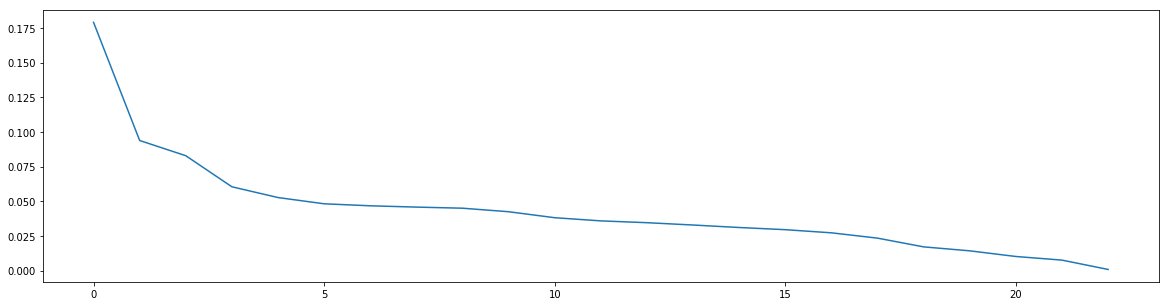

In [126]:
from sklearn.decomposition import PCA
pca_log_sc_out_rem1 = PCA()
pca_log_sc_out_rem1.fit(numeric_train_log_sc_out_rem_df)

plt.figure(figsize=(20,5))
plt.plot(pca_log_sc_out_rem1.explained_variance_ratio_, label='Standard Scaled Numeric')

### Elbow around 4, but we wish to test more so we will add 8.

In [127]:
pca_log_sc_out_rem = PCA(4)
pca_log_sc_out_rem.fit(numeric_train_log_sc_out_rem_df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [128]:
numeric_train_log_sc_out_rem_pca = pca_log_sc_out_rem.transform(numeric_train_log_sc_out_rem_df)
numeric_test_log_sc_pca = pca_log_sc_out_rem.transform(numeric_test_log_sc_df)

In [129]:
numeric_train_log_sc_out_rem_pca_df = pd.DataFrame(numeric_train_log_sc_out_rem_pca, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'
                          ], index=numeric_train_log_sc_out_rem_df.index)

In [130]:
numeric_test_log_sc_pca_df = pd.DataFrame(numeric_test_log_sc_pca, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'
                          ], index=numeric_test_log_sc_df.index)

### Merge datasets of numeric, categorical_encoded, and pca

In [131]:
trainset_1 = pd.merge(numeric_train_log_sc_out_rem_df, categorical_train_encoded_out_rem_df, left_index=True, right_index=True)
trainset_2 = pd.merge(trainset_1, numeric_train_log_sc_out_rem_pca_df, left_index=True, right_index=True)

In [132]:
testset_1 = pd.merge(numeric_test_log_sc_df, categorical_test_encoded_df, left_index=True, right_index=True)
testset_2 = pd.merge(testset_1, numeric_test_log_sc_pca_df, left_index=True, right_index=True)

In [133]:
testset_2

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_without,TotRmsAbvGrd_13,Utilities_without,MSSubClass_150,GarageCars_without,MSZoning_without,PC 1,PC 2,PC 3,PC 4
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.563711,0.482944,-0.331626,-1.155070,-0.815959,0.642211,2.342933,-0.024959,0.028608,-0.659886,...,0,0,0,0,0,0,1.303575,2.017213,-1.994192,0.085451
1462,0.602710,0.879380,-0.431095,-1.301918,0.968010,0.868926,-0.355342,0.194474,0.386245,0.581370,...,0,0,0,0,0,0,-0.161687,2.307362,-0.772014,0.233083
1463,0.319098,0.819235,0.850270,0.637809,-0.815959,0.817388,-0.355342,-0.389085,0.072948,-0.549422,...,0,0,0,0,0,0,-1.337187,-0.468361,0.141200,1.290860
1464,0.484247,0.188077,0.882796,0.637809,0.341775,0.726234,-0.355342,0.073081,0.071066,-0.556213,...,0,0,0,0,0,0,-1.689735,-0.795774,0.140926,0.937742
1465,-1.375932,-1.145753,0.687397,0.349337,-0.815959,0.450086,-0.355342,0.689127,0.353470,0.463074,...,0,0,0,0,0,0,-0.442173,-0.838819,-0.801962,-1.379747
1466,0.361197,0.192335,0.720004,0.445591,-0.815959,-1.414140,-0.355342,0.534260,-0.097782,-1.165643,...,0,0,0,0,0,0,-0.862191,-1.355946,1.552394,0.815200
1467,0.147132,-0.243908,0.687397,1.068896,-0.815959,0.873240,-0.355342,-0.104164,0.273586,0.225556,...,0,0,0,0,0,0,-0.948914,-0.129381,-1.391089,0.321131
1468,-0.185010,-0.144284,0.882796,0.637809,-0.815959,-1.414140,-0.355342,0.552316,-0.068563,-1.060182,...,0,0,0,0,0,0,-0.383247,-1.820867,1.354703,0.241342
1469,0.754090,0.226066,0.622134,0.252987,-0.815959,0.745098,-0.355342,0.458569,0.366997,0.609676,...,0,0,0,0,0,0,-0.821319,0.390751,-1.124936,-0.599715


In [134]:
#Remove outlier for target as well. 
target_1 = target_out_rem_df
target_2 = target_out_rem_df

# Model and Prediction
### Regression - Linear Regression model but it actually filters out certain features.

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor


gs_param_lasso = {
    'alpha' : np.logspace(-1,5,7)
}

gs_param_ridge = {
    'alpha' : np.logspace(-1,5,7)
}

In [136]:
#GridSearch create your own model with your own parameters. 
lasso_grid_search         = GridSearchCV(Lasso(), param_grid=gs_param_lasso, n_jobs=-1)
ridge_grid_search         = GridSearchCV(Ridge(), param_grid=gs_param_ridge, n_jobs=-1)

In [137]:
#training the model. Basically feeding them answers so they can predict later.
lasso_grid_search.fit(trainset_2, target_2)
ridge_grid_search.fit(trainset_2, target_2)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': array([  1.00000e-01,   1.00000e+00,   1.00000e+01,   1.00000e+02,
         1.00000e+03,   1.00000e+04,   1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
best_lasso = lasso_grid_search.best_estimator_
best_ridge = ridge_grid_search.best_estimator_

In [139]:
(lasso_grid_search.best_score_,
 ridge_grid_search.best_score_,)

(0.89507240849376035, 0.88929930116469535)

In [140]:
lasso_prediction = best_lasso.predict(testset_2)

In [141]:
ridge_prediction = best_ridge.predict(testset_2)

In [142]:
lasso_prediction_df = pd.DataFrame(lasso_prediction, columns = ["SalePrice"], index = testset_2.index)
ridge_prediction_df = pd.DataFrame(ridge_prediction, columns = ["SalePrice"], index = testset_2.index)

In [143]:
lasso_prediction_df.head(20)

,SalePrice
Id,
1461,116273.564245
1462,161022.403239
1463,192990.110666
1464,194148.505965
1465,213441.898456
1466,166590.631960
1467,173220.885983
1468,159354.514069
1469,210049.444111


In [144]:
ridge_prediction_df.head(20)

,SalePrice
Id,
1461,121767.598037
1462,156588.321269
1463,200855.035829
1464,194149.381157
1465,205656.717478
1466,166183.174038
1467,170019.783372
1468,157135.685364
1469,206849.066210


In [149]:
#lasso_prediction_df.to_csv("lasso_submission_2.csv")
# ridge_prediction_df.to_csv("ridge_submission_2.csv")

In [146]:
trainset_2.shape

(1453, 404)

In [147]:
testset_2.shape

(1459, 404)